# Spreetail Work Sample

Submitted by: Nishit Chaudhry

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

### ASIN Data

In [2]:
asin_data = pd.read_csv('work_sample/asin_data.csv')
asin_data.head()

,ASIN,BBR,offer_changed_notification_id
0,1616595965,0.331197,227603334.0
1,7300019196,0.000000,227607323.0
2,B00000IS6G,0.000000,227366981.0
3,B00000IV4A,0.061601,227609724.0
4,B00000IVFX,0.184462,227437651.0


In [3]:
asin_data.shape

(4762, 3)

In [4]:
asin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4762 entries, 0 to 4761
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASIN                           4762 non-null   object 
 1   BBR                            4762 non-null   float64
 2   offer_changed_notification_id  4762 non-null   float64
dtypes: float64(2), object(1)
memory usage: 111.7+ KB


### Offer Data

In [5]:
offer_data = pd.read_csv('work_sample/offer_data.csv')
offer_data.head()

,offer_changed_notification_id,seller_id,seller_positive_feed_back_rating,listing_price,is_amazon,is_fulfilled_by_amazon
0,226290157,A9HEF3NCNW35R,90.0,$198.96,False,False
1,226290157,A2SLNIN3CVUI6R,87.0,$399.99,False,False
2,226295962,A3HZSDZP7G2Z7D,91.0,$97.99,False,False
3,226301484,AYX4QZIGCPIZG,83.0,$79.83,False,False
4,226312446,A3QTWFHERA9T9K,92.0,$309.11,False,False


In [6]:
offer_data.shape

(35004, 6)

In [7]:
offer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35004 entries, 0 to 35003
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   offer_changed_notification_id     35004 non-null  int64  
 1   seller_id                         35004 non-null  object 
 2   seller_positive_feed_back_rating  35004 non-null  float64
 3   listing_price                     35004 non-null  object 
 4   is_amazon                         35004 non-null  bool   
 5   is_fulfilled_by_amazon            35004 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [8]:
#changing var type for consistency
offer_data['offer_changed_notification_id'] = offer_data['offer_changed_notification_id'].astype(float)

## I. Data Engineering

In [9]:
offer_data_aggregated = pd.read_csv('work_sample/offer_data_aggregated.csv')
offer_data_aggregated.head()

,offer_changed_notification_id,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
0,226290157,2,0,False,198.96,90.0
1,226295962,1,0,False,97.99,91.0
2,226301484,1,0,False,79.83,83.0
3,226312446,12,1,True,212.00,100.0
4,226321631,1,1,True,43.49,91.0


#### Empty Dataframe

Creating required dataframe for modeling

In [10]:
offer_data_agg = pd.DataFrame(index=offer_data['offer_changed_notification_id'].unique(),
                              columns = ['num_competitors',
                                         'num_fulfilled_by_amazon',
                                         'amazon_present',
                                         'min_price',
                                         'max_feed_back_rating'])
offer_data_agg.head()

,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
226290157.0,NaN,NaN,NaN,NaN,NaN
226295962.0,NaN,NaN,NaN,NaN,NaN
226301484.0,NaN,NaN,NaN,NaN,NaN
226312446.0,NaN,NaN,NaN,NaN,NaN
226321631.0,NaN,NaN,NaN,NaN,NaN


### 1. num_competitors
num_competitors - The number of records

In [11]:
offer_data_agg['num_competitors'] = offer_data.groupby('offer_changed_notification_id')['seller_id'].count()
offer_data_agg.head()

,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
226290157.0,2,NaN,NaN,NaN,NaN
226295962.0,1,NaN,NaN,NaN,NaN
226301484.0,1,NaN,NaN,NaN,NaN
226312446.0,12,NaN,NaN,NaN,NaN
226321631.0,1,NaN,NaN,NaN,NaN


### 2.  num_fulfilled_by_amazon
num_fulfilled_by_amazon - The number of records where is_fulfilled_by_amazon = True

In [12]:
offer_data_agg['num_fulfilled_by_amazon'] = offer_data.groupby('offer_changed_notification_id')['is_fulfilled_by_amazon'].sum()
offer_data_agg.head()

,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
226290157.0,2,0,NaN,NaN,NaN
226295962.0,1,0,NaN,NaN,NaN
226301484.0,1,0,NaN,NaN,NaN
226312446.0,12,1,NaN,NaN,NaN
226321631.0,1,1,NaN,NaN,NaN


### 3. amazon_present
amazon_present - A boolean flag signaling whether there is a record in the group where is_amazon = True

In [13]:
offer_data_agg['amazon_present'] = offer_data.groupby('offer_changed_notification_id')['is_amazon'].sum().apply(lambda x: True if x==1 else False)
offer_data_agg.head()

,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
226290157.0,2,0,False,NaN,NaN
226295962.0,1,0,False,NaN,NaN
226301484.0,1,0,False,NaN,NaN
226312446.0,12,1,True,NaN,NaN
226321631.0,1,1,True,NaN,NaN


### 4. min_price
min_price - The minimum value of listing_price within the group. This needs to be numeric (rather than a string/text)

In [14]:
offer_data_copy = offer_data[['offer_changed_notification_id','listing_price']]
offer_data_copy['listing_price'] = offer_data_copy['listing_price'].replace("[$,]","",regex=True).astype(float)
offer_data_copy.head()

,offer_changed_notification_id,listing_price
0,226290157.0,198.96
1,226290157.0,399.99
2,226295962.0,97.99
3,226301484.0,79.83
4,226312446.0,309.11


In [15]:
offer_data_agg['min_price'] = offer_data_copy.groupby('offer_changed_notification_id')['listing_price'].min()
offer_data_agg.head()

,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
226290157.0,2,0,False,198.96,NaN
226295962.0,1,0,False,97.99,NaN
226301484.0,1,0,False,79.83,NaN
226312446.0,12,1,True,212.00,NaN
226321631.0,1,1,True,43.49,NaN


### 5. max_feed_back_rating
max_feed_back_rating - The maximum seller_positive_feed_back_rating within the group

In [16]:
offer_data_agg['max_feed_back_rating'] = offer_data.groupby('offer_changed_notification_id')['seller_positive_feed_back_rating'].max()
offer_data_agg.head()

,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
226290157.0,2,0,False,198.96,90.0
226295962.0,1,0,False,97.99,91.0
226301484.0,1,0,False,79.83,83.0
226312446.0,12,1,True,212.00,100.0
226321631.0,1,1,True,43.49,91.0


In [17]:
offer_data_agg.reset_index(inplace=True)
offer_data_agg = offer_data_agg.rename(columns={'index':'offer_changed_notification_id'})
offer_data_agg.head()

,offer_changed_notification_id,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
0,226290157.0,2,0,False,198.96,90.0
1,226295962.0,1,0,False,97.99,91.0
2,226301484.0,1,0,False,79.83,83.0
3,226312446.0,12,1,True,212.00,100.0
4,226321631.0,1,1,True,43.49,91.0


In [18]:
offer_data_agg['offer_changed_notification_id'] = offer_data_agg['offer_changed_notification_id'].astype(int)

#### Comparing aggregated dataframe with sample provided

In [19]:
offer_data_aggregated.equals(offer_data_agg)

True

### Merging the obtained datasets together

In [20]:
final_data = pd.merge(left = asin_data,
                     right = offer_data_agg,
                     how = 'inner',
                     on = 'offer_changed_notification_id')

In [21]:
final_data.head()

,ASIN,BBR,offer_changed_notification_id,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
0,1616595965,0.331197,227603334.0,4,3,False,36.15,100.0
1,7300019196,0.000000,227607323.0,15,0,False,66.98,96.0
2,B00000IS6G,0.000000,227366981.0,2,1,True,99.00,100.0
3,B00000IV4A,0.061601,227609724.0,4,3,True,41.49,99.0
4,B00000IVFX,0.184462,227437651.0,3,2,True,46.79,99.0


In [22]:
final_data.shape

(4762, 8)

In [23]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4762 entries, 0 to 4761
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASIN                           4762 non-null   object 
 1   BBR                            4762 non-null   float64
 2   offer_changed_notification_id  4762 non-null   float64
 3   num_competitors                4762 non-null   int64  
 4   num_fulfilled_by_amazon        4762 non-null   int64  
 5   amazon_present                 4762 non-null   bool   
 6   min_price                      4762 non-null   float64
 7   max_feed_back_rating           4762 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 302.3+ KB


In [24]:
final_data_sample = pd.read_csv('work_sample/final_data_sample.csv')
final_data_sample

,ASIN,BBR,offer_changed_notification_id,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
0,1616595965,0.331197,227603334.0,4,3,False,36.15,100.0
1,7300019196,0.000000,227607323.0,15,0,False,66.98,96.0
2,B00000IS6G,0.000000,227366981.0,2,1,True,99.00,100.0
3,B00000IV4A,0.061601,227609724.0,4,3,True,41.49,99.0
4,B00000IVFX,0.184462,227437651.0,3,2,True,46.79,99.0


#### Comparing final dataframe with the sample provided

In [25]:
final_data_sample.equals(final_data.head())

True

## II. Data Visualization

In [26]:
# Dropping redundant columns which are not useful for modeling
df = final_data.drop(columns = ['ASIN', 'offer_changed_notification_id'])

In [27]:
df.describe()

,BBR,num_competitors,num_fulfilled_by_amazon,min_price,max_feed_back_rating
count,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000
mean,0.243817,7.350693,1.324864,170.599118,94.324234
std,0.314625,5.989214,1.942269,332.808201,9.530783
min,0.000000,1.000000,0.000000,2.990000,0.000000
25%,0.000161,2.000000,0.000000,44.990000,91.000000
50%,0.086705,5.000000,1.000000,86.645000,96.000000
75%,0.391353,11.000000,2.000000,169.997500,100.000000
max,1.000000,20.000000,18.000000,5989.000000,100.000000


#### Functions to visualize variables

In [28]:
def plot_feature_boxplot(feature):
    plt.figure(figsize=[8,6])
    sns.boxplot(y=df[feature])
    plt.show()

In [29]:
def plot_barplot(feature, hue=None, rotation='horizontal'):
    plt.figure(figsize=[15,8])
    sns.barplot(data=df, x=feature, y='BBR', hue=hue)
    plt.xticks(rotation=rotation)
    plt.show()

In [30]:
def plot_jointplot(feature):
    sns.jointplot(data=df, x=feature, y='BBR')
    plt.show()

In [31]:
def plot_boxplot(feature, hue=None):
    plt.figure(figsize=[15,8])
    sns.boxplot(data=df, x=feature, y='BBR', hue=hue)
    plt.show()

In [32]:
def plot_distplot(feature):
    plt.figure(figsize=[8,6])
    sns.distplot(data[feature])
    plt.show()

### Var 1 - Amazon Present

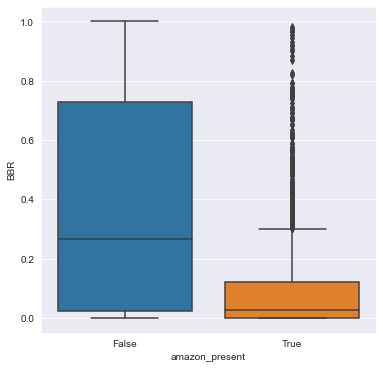

In [33]:
plt.figure(figsize=[6,6])
sns.boxplot(data=df, x='amazon_present', y='BBR')
plt.show()

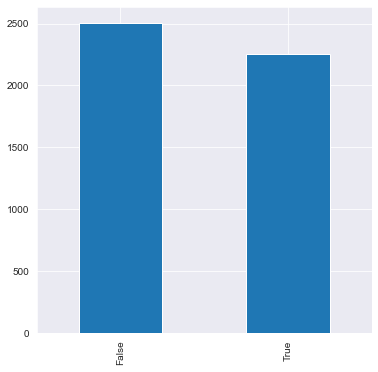

In [34]:
plt.figure(figsize=[6,6])
df['amazon_present'].value_counts().plot(kind='bar')
plt.show()

Checking data imbalance in amazon_present variable -> this variable is relatively balanced for comparison

##### Key takeways:

- BBR score has negative impact by Amazon's presence
- Just by Amazon's presence in a listing, median BBR score reduces from 0.3 to 0.03 (90% reduction)

### Var 2 - Number of Competitors

#### Bar Plots

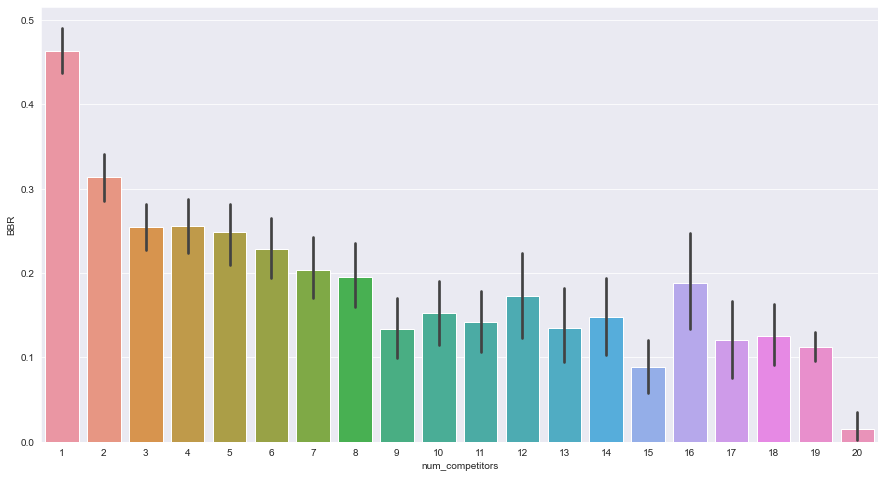

In [35]:
plot_barplot('num_competitors')

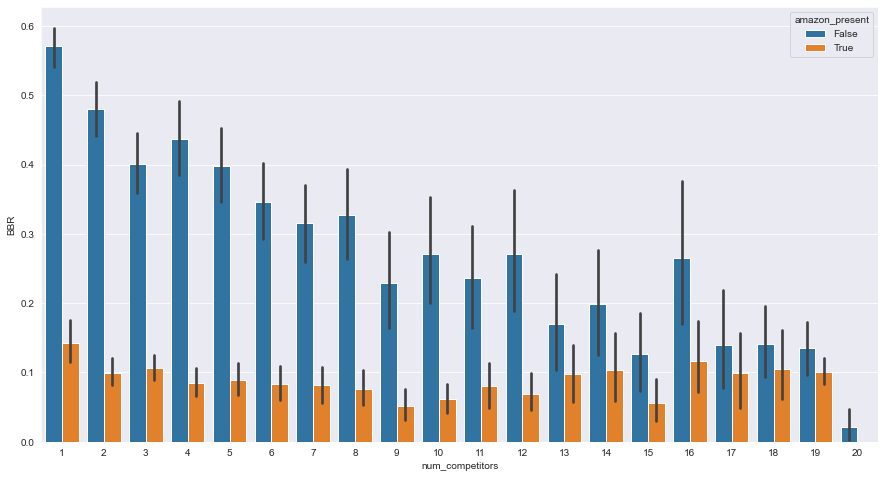

In [36]:
plot_barplot(feature='num_competitors', hue='amazon_present')

#### Box Plots

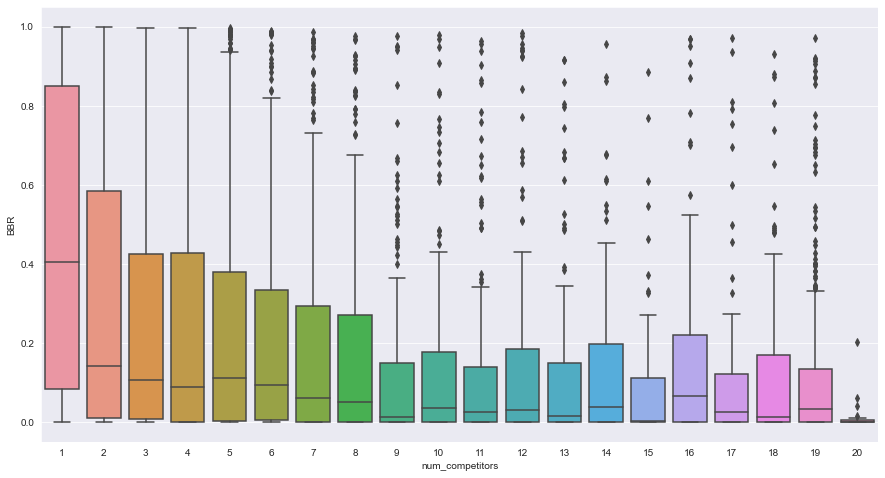

In [37]:
plot_boxplot('num_competitors')

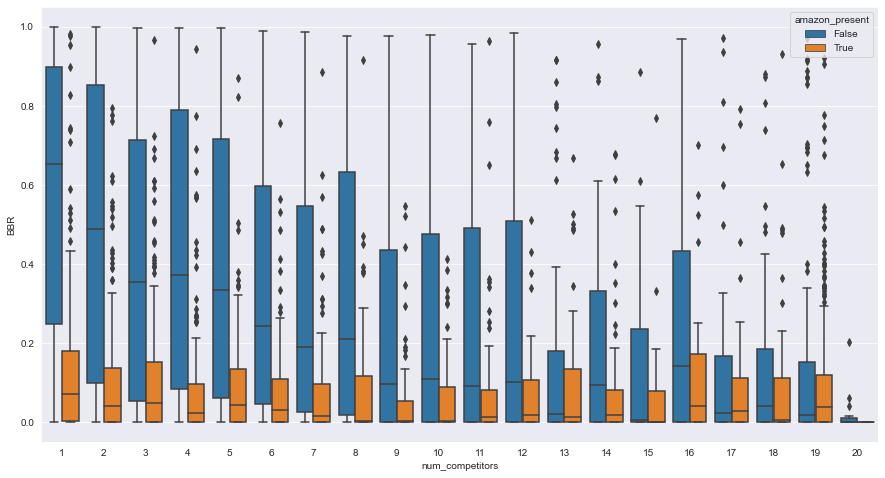

In [38]:
plot_boxplot(feature='num_competitors', hue='amazon_present')

##### Key takeaways:

- Number of competitors has negative impact on BBR score
- When Amazon is not present, the increase in competitors decrease the BBR score
- But when Amazon is present, increase in competitors doesn't necessarily increase or decrease the BBR score

### Var 3 - Numbers Fulfilled by Amazon

#### Bar Plots

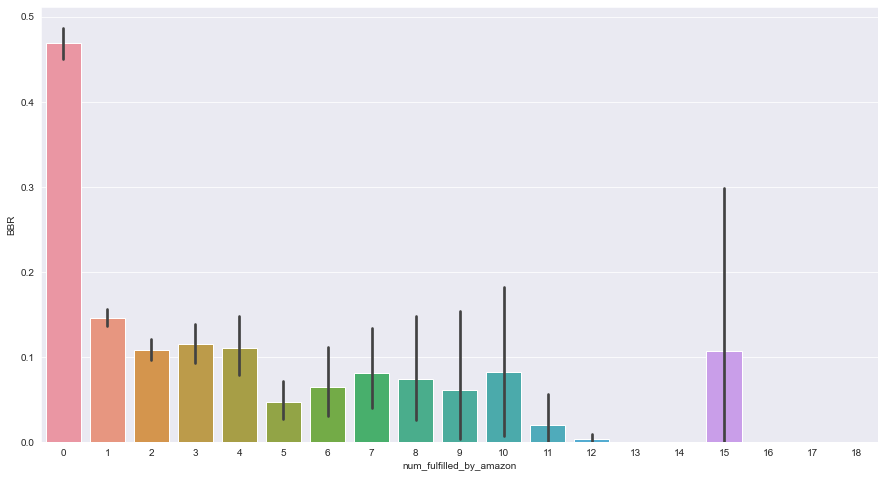

In [39]:
plot_barplot('num_fulfilled_by_amazon')

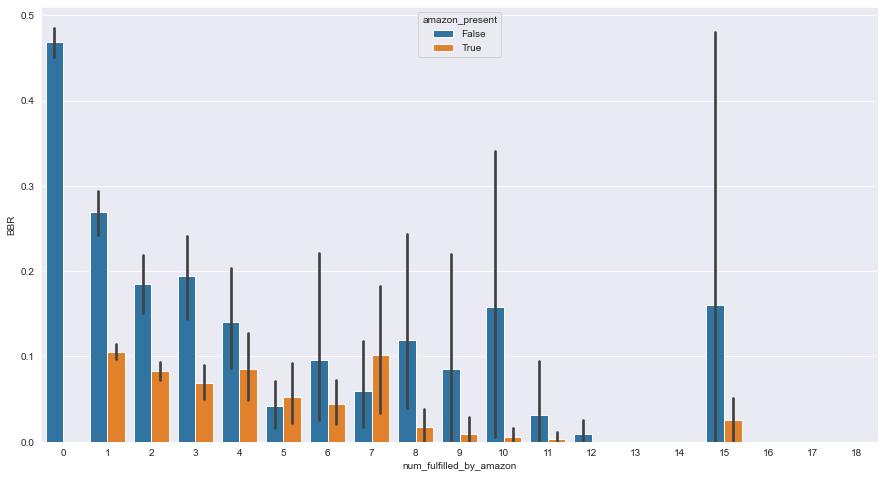

In [40]:
plot_barplot('num_fulfilled_by_amazon', hue='amazon_present')

#### Box Plots

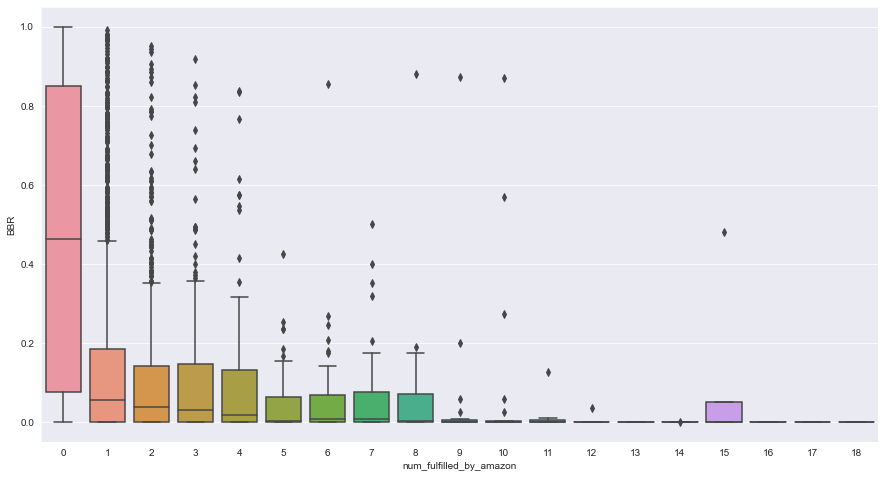

In [41]:
plot_boxplot('num_fulfilled_by_amazon')

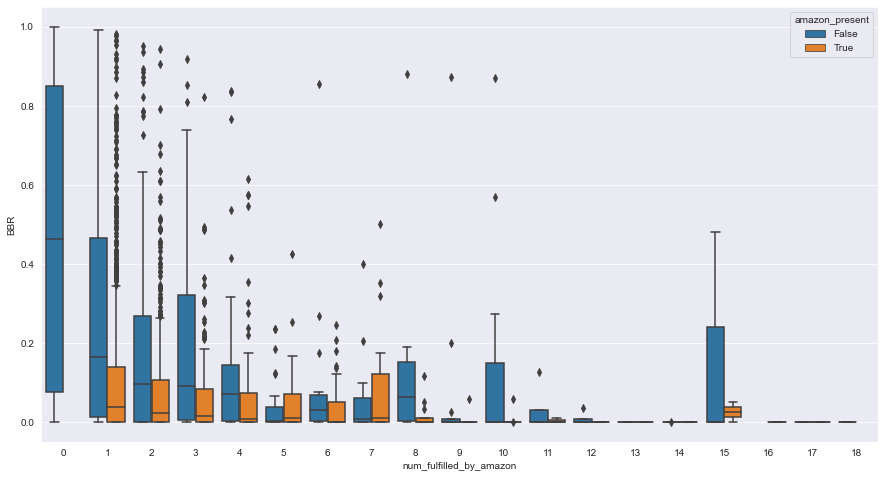

In [42]:
plot_boxplot('num_fulfilled_by_amazon', hue='amazon_present')

##### Key takeaways:

- Again we observe that as the number fulfilled by Amazon increases, BBR score reduces overall
- Median BBR score reduces from 0.5 to 0.05(90% decrease) when num_fulfiled_by_amazon increase from 0 to 1

### Var 4 - Max Feedback Rating

#### Scatter Plots

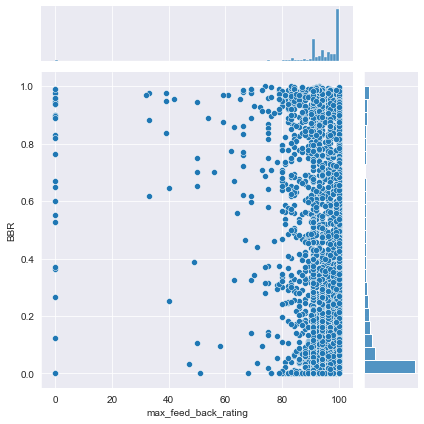

In [43]:
plot_jointplot('max_feed_back_rating')

No relationship is evident between BBR and max_feed_back_rating variables

#### Bar Plots

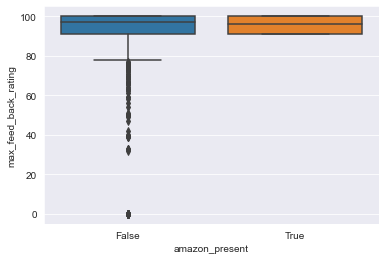

In [44]:
sns.boxplot(y=df['max_feed_back_rating'], x=df['amazon_present'])
plt.show()

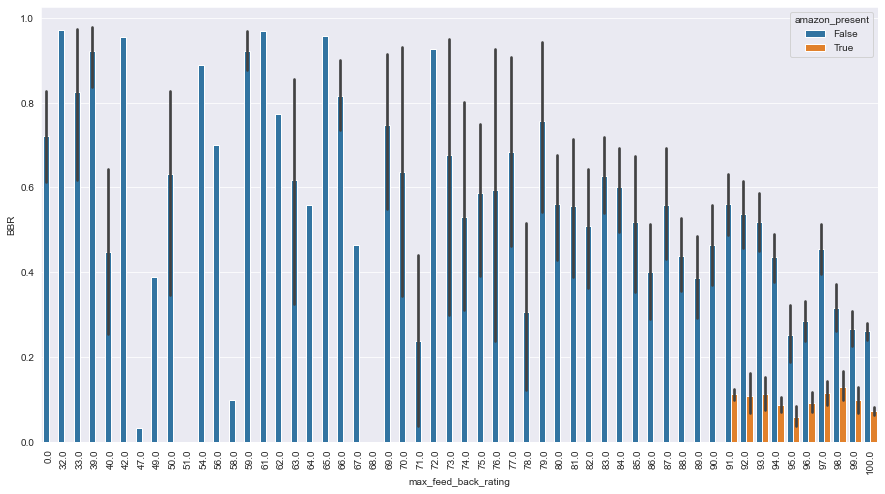

In [45]:
plot_barplot('max_feed_back_rating', rotation='vertical', hue='amazon_present')

Note when Amazon is present, max_feed_back_rating is above 90 and BBR score is around 0.1 on average.

### Var 5 - Minimum Price

#### Scatter Plots

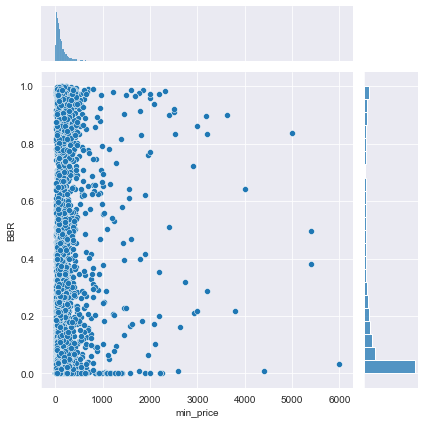

In [46]:
plot_jointplot('min_price')

No relationship is evident between BBR and min_price variables

### Correlation plot between numerical features

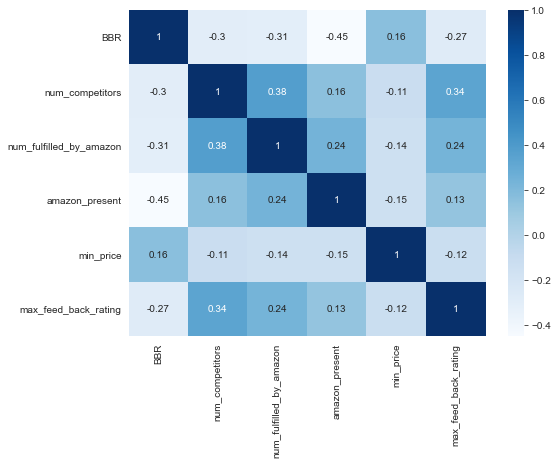

In [47]:
plt.figure(figsize=[8,6])
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

#### Plotting individual feature's boxplot to visualize outlier's presence

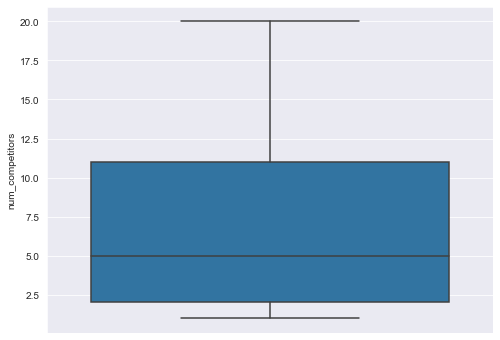

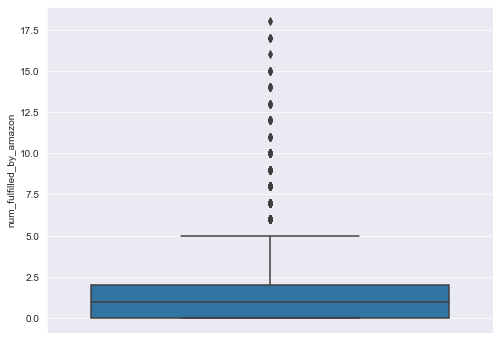

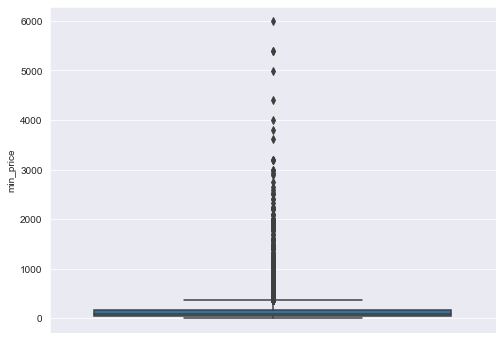

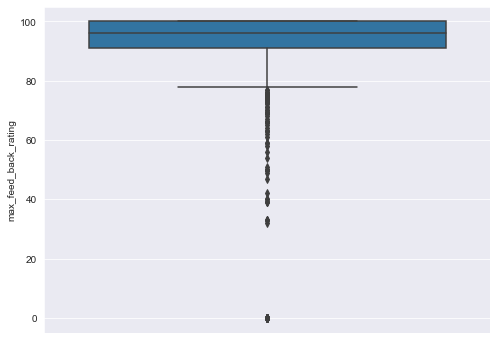

In [48]:
num_cols = [feature for feature in df.columns if feature not in ['BBR','amazon_present']]
for feature in num_cols:
    plot_feature_boxplot(feature)

- High outliers are observed in both min_price and max_feed_back_rating features

### BBR score distribution

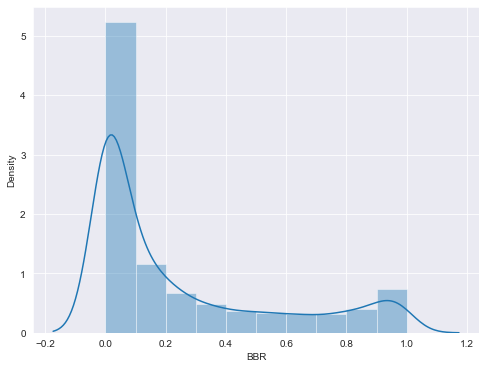

In [49]:
plt.figure(figsize=[8,6])
sns.distplot(df['BBR'], bins=10)
plt.show()

This dataset consists high number of listings where Spreetail's BBR score is between 0-0.1 (Rightly skewed)

### Summary from Data Visualisation:

Important variables that can significantly impact BBR score are:
1. Amazon Present
2. Number of Competitors
3. Number fulfilled by Amazon

## III. Statistical/ML Modeling

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [51]:
#encoding boolean values to numerical ones
encoder = LabelEncoder()
df['amazon_present'] = encoder.fit_transform(df['amazon_present'])
df.head()

,BBR,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
0,0.331197,4,3,0,36.15,100.0
1,0.000000,15,0,0,66.98,96.0
2,0.000000,2,1,1,99.00,100.0
3,0.061601,4,3,1,41.49,99.0
4,0.184462,3,2,1,46.79,99.0


Taking three most important features observed during data visualisation

1. amazon_present
2. num_fulfilled_by_amazon
3. num_competitors

In [52]:
columns = ['amazon_present', 'num_fulfilled_by_amazon', 'num_competitors']

#### Train-Test Split

In [53]:
features = df[columns]
target = df['BBR']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target,
                                                                            test_size=0.2,
                                                                            random_state=42)

#### Feature Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_train_scaled = pd.DataFrame(features_train_scaled, columns=features_train.columns)

features_test_scaled = scaler.transform(features_test)
features_test_scaled = pd.DataFrame(features_test_scaled, columns=features_test.columns)

In [55]:
features_train_scaled.head()

,amazon_present,num_fulfilled_by_amazon,num_competitors
0,0.0,0.000000,0.315789
1,1.0,0.055556,0.157895
2,1.0,0.055556,0.421053
3,0.0,0.166667,0.263158
4,0.0,0.111111,0.473684


#### Model Building

In [56]:
model = LinearRegression()
model.fit(features_train_scaled, target_train)

LinearRegression()

In [57]:
model.score(features_train_scaled, target_train)

0.2818143886268445

In [58]:
target_pred = model.predict(features_test_scaled)

In [59]:
model.intercept_

0.4587408188970352

In [60]:
model.coef_

array([-0.25278315, -0.39679904, -0.18706306])

In [61]:
features.columns

Index(['amazon_present', 'num_fulfilled_by_amazon', 'num_competitors'], dtype='object')

#### Model Evaluation

In [62]:
target_train_pred = model.predict(features_train_scaled)

In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('*'*50)
print('Metrics Performance')
print('*'*50)


print(50*'-')
print('TRAIN DATA')
print(50*'-')


# Train
r2_train = r2_score(target_train, target_train_pred)
print("R-Squared",round(r2_train,3))
adjusted_r_train = 1 - (1-r2_train)*(len(target_train)-1)/(len(target_train)-features_train.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_train,3))
mse_train = mean_squared_error(target_train, target_train_pred)
print("MSE",round(mse_train,3))
rmse_train = mse_train**0.5
print('RMSE: ', round(rmse_train,3))
mae_train = mean_absolute_error(target_train, target_train_pred)
print('MAE: ', round(mae_train,3))

residuals_train = target_train - target_train_pred
rss_train = np.sum(np.square(residuals_train))
print('RSS: ', round(rss_train,3))

print(50*'-')
print('TEST DATA')
print(50*'-')


# Test
r2_test = r2_score(target_test, target_pred)
print('R-Squared: ', round(r2_test,3))
adjusted_r_test = 1 - (1-r2_test)*(len(target_test)-1)/(len(target_test)-features_test.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_test,3))


mse_test = mean_squared_error(target_test, target_pred)
print('MSE: ', round(mse_test,3))
rmse_test = mse_test**0.5
print('RMSE: ', round(rmse_test,3))
mae_test = mean_absolute_error(target_test, target_pred)
print('MAE: ', round(mae_test,3))


# RSS
residuals_test = target_test - target_pred
rss_test = np.sum(np.square(residuals_test))
print('RSS: ', round(rss_test,3))

print('*'*50)

**************************************************
Metrics Performance
**************************************************
--------------------------------------------------
TRAIN DATA
--------------------------------------------------
R-Squared 0.282
Adj. R-Squared:  0.281
MSE 0.072
RMSE:  0.268
MAE:  0.212
RSS:  274.001
--------------------------------------------------
TEST DATA
--------------------------------------------------
R-Squared:  0.239
Adj. R-Squared:  0.237
MSE:  0.071
RMSE:  0.267
MAE:  0.21
RSS:  67.936
**************************************************


### Polynomial Modeling

In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
features_train_p = poly_reg.fit_transform(features_train_scaled)
pol_model = LinearRegression()
pol_model.fit(features_train_p, target_train)
target_train_pred_p = pol_model.predict(features_train_p)

features_test_p = poly_reg.transform(features_test_scaled)
target_pred_p = pol_model.predict(features_test_p)

In [65]:
print('*'*50)
print('Metrics Performance')
print('*'*50)


print(50*'-')
print('TRAIN DATA')
print(50*'-')


# Train
r2_train = r2_score(target_train, target_train_pred_p)
print("R-Squared",round(r2_train,3))
adjusted_r_train = 1 - (1-r2_train)*(len(target_train)-1)/(len(target_train)-features_train.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_train,3))
mse_train = mean_squared_error(target_train, target_train_pred_p)
print("MSE",round(mse_train,3))
rmse_train = mse_train**0.5
print('RMSE: ', round(rmse_train,3))
mae_train = mean_absolute_error(target_train, target_train_pred_p)
print('MAE: ', round(mae_train,3))

residuals_train = target_train - target_train_pred_p
rss_train = np.sum(np.square(residuals_train))
print('RSS: ', round(rss_train,3))

print(50*'-')
print('TEST DATA')
print(50*'-')


# Test
r2_test = r2_score(target_test, target_pred_p)
print('R-Squared: ', round(r2_test,3))
adjusted_r_test = 1 - (1-r2_test)*(len(target_test)-1)/(len(target_test)-features_test.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_test,3))


mse_test = mean_squared_error(target_test, target_pred_p)
print('MSE: ', round(mse_test,3))
rmse_test = mse_test**0.5
print('RMSE: ', round(rmse_test,3))
mae_test = mean_absolute_error(target_test, target_pred_p)
print('MAE: ', round(mae_test,3))


# RSS
residuals_test = target_test - target_pred
rss_test = np.sum(np.square(residuals_test))
print('RSS: ', round(rss_test,3))

print('*'*50)

**************************************************
Metrics Performance
**************************************************
--------------------------------------------------
TRAIN DATA
--------------------------------------------------
R-Squared 0.347
Adj. R-Squared:  0.346
MSE 0.065
RMSE:  0.256
MAE:  0.195
RSS:  249.316
--------------------------------------------------
TEST DATA
--------------------------------------------------
R-Squared:  0.319
Adj. R-Squared:  0.317
MSE:  0.064
RMSE:  0.253
MAE:  0.192
RSS:  67.936
**************************************************


- Best Fit Line: Minimizes the RSS
- Strength of Linear Regression model: R squared(Coeff. of Determination) -> (1-RSS/TSS)
- SST = SSR + SSE (Sum of Square due to Regression + Sum of Squares due to Error)

**Model accuracy metrics**:
R-squared indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.

#### Actual and Predicted target

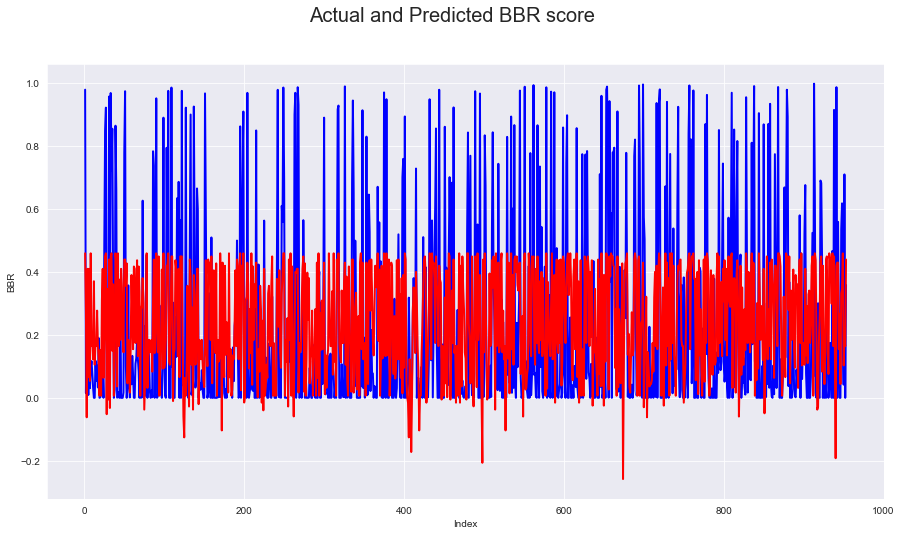

In [66]:
index_length = target_test.shape[0]+1

indexes = [i for i in range(1,index_length,1)]
fig = plt.figure(figsize=[15,8])
plt.plot(indexes,target_test, color="blue", linewidth=2, linestyle="-") 
plt.plot(indexes,target_pred, color="red", linewidth=2, linestyle="-") 
fig.suptitle('Actual and Predicted BBR score', fontsize=20)
plt.xlabel('Index')
plt.ylabel('BBR')
plt.show()

#### Residual Plots

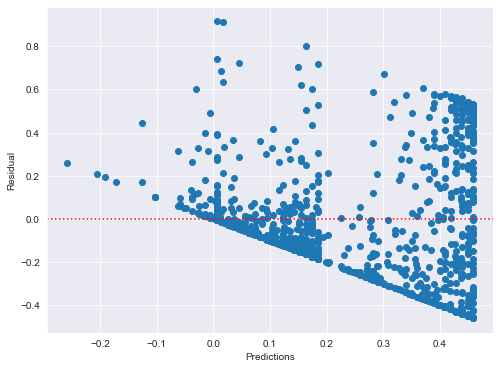

In [67]:
residuals_train = target_train - target_train_pred
residuals = target_test - target_pred
test_data = pd.DataFrame(features_test, columns=columns)
test_data['BBR'] = target_test
test_data['BBR_Pred'] = target_pred
test_data['Residual'] = residuals
plt.figure(figsize=[8,6])
plt.scatter(target_pred , test_data['Residual'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [68]:
def plot_residual(feature):
    plt.figure(figsize=[8,6])
    plt.scatter(test_data[feature] , test_data['Residual'])
    plt.axhline(y=0, color='r', linestyle=':')
    plt.xlabel(feature)
    plt.ylabel("Residual")
    plt.show()

In [69]:
test_data.head()

,amazon_present,num_fulfilled_by_amazon,num_competitors,BBR,BBR_Pred,Residual
828,0,0,1,0.978289,0.458741,0.519548
1061,0,0,20,0.014803,0.271678,-0.256875
1231,1,5,17,0.253606,-0.061791,0.315397
2570,0,0,6,0.179208,0.409514,-0.230306
1417,1,1,13,0.008986,0.065768,-0.056782


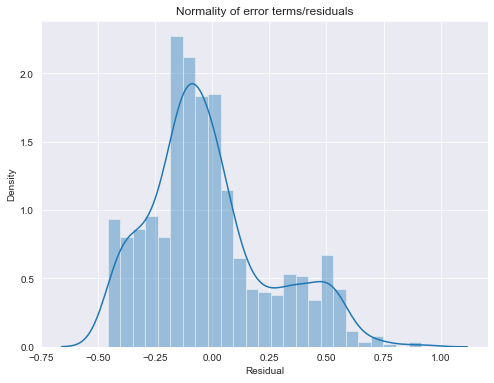

In [70]:
plt.figure(figsize=[8,6])
sns.distplot(residuals, kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

#### Q-Q Plot

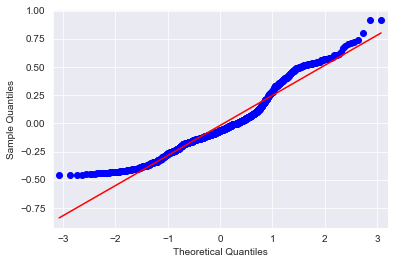

In [71]:
import statsmodels.api as sm

fig = sm.qqplot(residuals, line='s')
plt.show()

Q-Q plots shown above signifies that the residuals follow normal distribution (data points lie close to 45-degree line), although slightly right-skewed

### Checking p-value for the selected variables to check the selected features signifance

In [72]:
X_train_const = sm.add_constant(features_train)
y_train = target_train.values.reshape(-1,1)
lr = sm.OLS(y_train, X_train_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     497.7
Date:                Thu, 05 May 2022   Prob (F-statistic):          8.09e-273
Time:                        03:21:58   Log-Likelihood:                -392.11
No. Observations:                3809   AIC:                             792.2
Df Residuals:                    3805   BIC:                             817.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**Formulae:**

ANOVA: It is performed by comparing two types of variation, the variation between the sample means, as well as the variation within each of the samples.
1. DF(t) = DF(reg)+DF(res)
2. SST = SSR + SSE
3. MSE = SSE/DF(res)
4. MSR = SSR/DF(reg)
5. F-stat = MSR/MSE [Test for overall significance] -> Prob(F-stat)
6. t-stats = coef/SE [Test for individual significance]
7. R-sq = 1 - (SSE/SST); SSE=Sum of Square of Residuals

- Here, in regression model building, the null hypothesis corresponding to each p-value is that the corresponding independent variable does not impact the dependent variable. 
- The alternate hypothesis is that the corresponding independent variable impacts the response.
- P-value indicates the probability that the null hypothesis is true. 
- Therefore, a low p-value, i.e. less than 0.05, indicates that you can reject the null hypothesis.

#### Recursive Feature Selection

Using RFE to confirm top 3 features for the model

In [73]:
from sklearn.feature_selection import RFE

all_features = df.drop(columns='BBR')

# Selecting Top3 columns
lr = LinearRegression()
rfe = RFE(lr, 3)
rfe = rfe.fit(all_features, target)

pd.DataFrame(zip(all_features.columns, rfe.ranking_),columns=["Columns","Ranking"])

,Columns,Ranking
0,num_competitors,1
1,num_fulfilled_by_amazon,1
2,amazon_present,1
3,min_price,3
4,max_feed_back_rating,2


Confirming the top 3 features through RFE 

In [74]:
top_3 = all_features.columns[rfe.support_]
pd.DataFrame(top_3)

,0
0,num_competitors
1,num_fulfilled_by_amazon
2,amazon_present


In [75]:
X_train_rfe = all_features[top_3]
X_train_rfe.head()

,num_competitors,num_fulfilled_by_amazon,amazon_present
0,4,3,0
1,15,0,0
2,2,1,1
3,4,3,1
4,3,2,1


### Check for multicollinearity in features using Variance Inflation Factor(VIF)

Multicollinearity makes it difficult to assess the effect of individual predictors. A variable with a high VIF means it can be largely explained by other independent variables.

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X_data):
    vif = pd.DataFrame()
    X = X_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    vif.reset_index(inplace=True, drop=True)
    return vif

In [77]:
vif(X_train_rfe)

,Features,VIF
0,num_competitors,2.00
1,num_fulfilled_by_amazon,1.77
2,amazon_present,1.67


VIF score for these above variables is atmost 2 which means there is no multicollinearity among the features (threshold=2)

**Problems faced during Regression**
1. Multicollinearity -> not possible to determine separate effect of any particular independent variable on the dependent variable
2. Heteroscedasticity
3. Endogeniety -> presence of hidden variable - domain specific

Assumptions on error term:

1. E is a random variable
2. E is normally distributed
3. Mean of normal distribution is zero
4. E has constant variance. Doesn't change with values in values of independent variable

Any assumption above is violated, we encounter Heteroscedasticity

### Regression equation

In [78]:
model.intercept_

0.4587408188970352

In [79]:
model.coef_

array([-0.25278315, -0.39679904, -0.18706306])

In [80]:
columns

['amazon_present', 'num_fulfilled_by_amazon', 'num_competitors']

### BBR = 0.46 - 0.25(amazon_present) - 0.39(num_fulfilled_by_amazon) - 0.19(num_competitors)

### Final Words

- Although the model above doesn't fully explain the variability in target variable(BBR), we observe some extent of explainability of BBR from these three features
- These variables show negative relationship with BBR score as seen from the regression equation
- Minimum Price and Maximum Feedback consisted of outliers which needs to be handled according to the business /domain knowledge to interpret their usefulness in explaining the BBR score
- Multiple regression model was used to predict target variable. The results show that there may be hidden features or presence of higher dimensional relationship(non-linear) between features and target variable to further investigate and improve the model results


**Key Takeaways:**
- Spreetail should focus more on products where Amazon is not present
- Low number fulfilled by Amazon(0-3 units), increases the chances of 'winning' as shown from higher BBR score (for e.g. median BBR score of 0.5 for 0 units fulfilled by Amazon)
- As the number of competitors increase, chances of winning decreases when Amazon is not present

## --------------------------------------------------------------------------------------------

### Miscellaneous Experimentation

- Trying XGBoost model
- Handling outliers for price and feedback variables

In [81]:
df.head()

,BBR,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
0,0.331197,4,3,0,36.15,100.0
1,0.000000,15,0,0,66.98,96.0
2,0.000000,2,1,1,99.00,100.0
3,0.061601,4,3,1,41.49,99.0
4,0.184462,3,2,1,46.79,99.0


In [82]:
#! pip install xgboost

In [83]:
# sns.lmplot(x="num_fulfilled_by_amazon", y="BBR", data=df, logistic=True, col="amazon_present")
# plt.show()

# sns.lmplot(x="num_competitors", y="BBR", data=df, logistic=True)
# plt.show()

# sns.lmplot(x="min_price", y="BBR", data=df)
# plt.show()

# sns.lmplot(x="max_feed_back_rating", y="BBR", data=df)
# plt.show()

#### XGBoost

In [84]:
features_train_scaled.head()

,amazon_present,num_fulfilled_by_amazon,num_competitors
0,0.0,0.000000,0.315789
1,1.0,0.055556,0.157895
2,1.0,0.055556,0.421053
3,0.0,0.166667,0.263158
4,0.0,0.111111,0.473684


In [85]:
from xgboost import XGBRegressor

model_xg = XGBRegressor()

model_xg.fit(features_train_scaled, target_train)

target_pred_xg = model_xg.predict(features_test_scaled)
target_train_pred_xg = model_xg.predict(features_train_scaled)

In [86]:
print('*'*50)
print('Metrics Performance')
print('*'*50)


print(50*'-')
print('TRAIN DATA')
print(50*'-')


# Train
r2_train_xg = r2_score(target_train, target_train_pred_xg)
print("R-Squared",round(r2_train_xg,3))
adjusted_r_train_xg = 1 - (1-r2_train_xg)*(len(target_train)-1)/(len(target_train)-features_train.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_train_xg,3))
mse_train_xg = mean_squared_error(target_train, target_train_pred_xg)
print("MSE",round(mse_train_xg,3))
rmse_train_xg = mse_train**0.5
print('RMSE: ', round(rmse_train_xg,3))
mae_train_xg = mean_absolute_error(target_train, target_train_pred_xg)
print('MAE: ', round(mae_train_xg,3))

residuals_train_xg = target_train - target_train_pred_xg
rss_train_xg = np.sum(np.square(residuals_train_xg))
print('RSS: ', round(rss_train_xg,3))

print(50*'-')
print('TEST DATA')
print(50*'-')


# Test
r2_test_xg = r2_score(target_test, target_pred_xg)
print('R-Squared: ', round(r2_test_xg,3))
adjusted_r_test_xg = 1 - (1-r2_test_xg)*(len(target_test)-1)/(len(target_test)-features_test.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_test_xg,3))


mse_test_xg = mean_squared_error(target_test, target_pred_xg)
print('MSE: ', round(mse_test_xg,3))
rmse_test_xg = mse_test_xg**0.5
print('RMSE: ', round(rmse_test_xg,3))
mae_test_xg = mean_absolute_error(target_test, target_pred_xg)
print('MAE: ', round(mae_test_xg,3))


# RSS
residuals_test_xg = target_test - target_pred_xg
rss_test_xg = np.sum(np.square(residuals_test_xg))
print('RSS: ', round(rss_test_xg,3))

print('*'*50)

**************************************************
Metrics Performance
**************************************************
--------------------------------------------------
TRAIN DATA
--------------------------------------------------
R-Squared 0.394
Adj. R-Squared:  0.394
MSE 0.061
RMSE:  0.256
MAE:  0.182
RSS:  231.086
--------------------------------------------------
TEST DATA
--------------------------------------------------
R-Squared:  0.328
Adj. R-Squared:  0.326
MSE:  0.063
RMSE:  0.251
MAE:  0.187
RSS:  60.03
**************************************************


### Modeling after Handling Outliers

In [87]:
df.describe()

,BBR,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
count,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000
mean,0.243817,7.350693,1.324864,0.473331,170.599118,94.324234
std,0.314625,5.989214,1.942269,0.499341,332.808201,9.530783
min,0.000000,1.000000,0.000000,0.000000,2.990000,0.000000
25%,0.000161,2.000000,0.000000,0.000000,44.990000,91.000000
50%,0.086705,5.000000,1.000000,0.000000,86.645000,96.000000
75%,0.391353,11.000000,2.000000,1.000000,169.997500,100.000000
max,1.000000,20.000000,18.000000,1.000000,5989.000000,100.000000


In [88]:
df2 = final_data.copy()
df2.drop(columns=['ASIN', 'offer_changed_notification_id'], inplace=True)
df2.shape

(4762, 6)

#### Median imputation for max_feed_back_rating

In [89]:
max_feed_med = np.median(df2['max_feed_back_rating'])
tenth_percentile = np.percentile(df2['max_feed_back_rating'], 1)
df2['max_feed_back_rating_trimmed'] = df2['max_feed_back_rating'].apply(lambda x: max_feed_med if x<tenth_percentile else x)

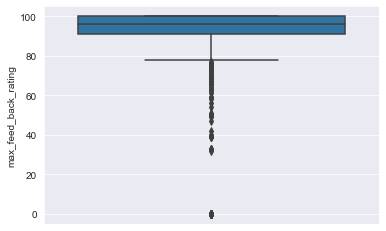

In [90]:
sns.boxplot(y=df['max_feed_back_rating'])
plt.show()

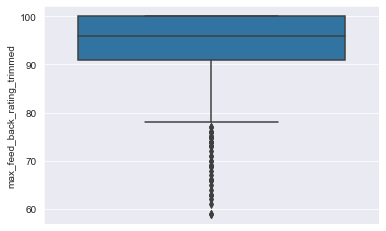

In [91]:
sns.boxplot(y=df2['max_feed_back_rating_trimmed'])
plt.show()

#### Median imputation for min_price

In [92]:
min_price_med = np.median(df2['min_price'])
ninety_percentile = np.percentile(df2['min_price'], 99)
df2['min_price_trimmed'] = df2['min_price'].apply(lambda x: max_feed_med if x>ninety_percentile else x)

In [93]:
np.percentile(df2['min_price_trimmed'], 99)

1054.0021000000052

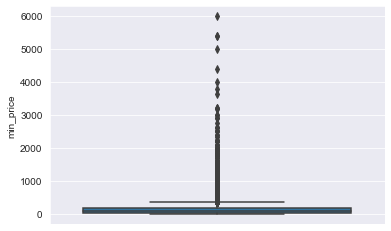

In [94]:
sns.boxplot(y=df['min_price'])
plt.show()

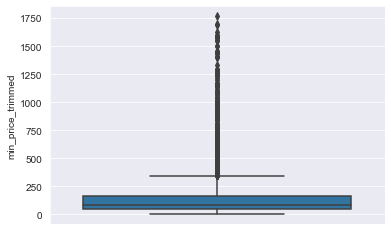

In [95]:
sns.boxplot(y=df2['min_price_trimmed'])
plt.show()

In [96]:
df2.describe()

,BBR,num_competitors,num_fulfilled_by_amazon,min_price,max_feed_back_rating,max_feed_back_rating_trimmed,min_price_trimmed
count,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000
mean,0.243817,7.350693,1.324864,170.599118,94.324234,95.075388,144.347186
std,0.314625,5.989214,1.942269,332.808201,9.530783,5.522366,186.784846
min,0.000000,1.000000,0.000000,2.990000,0.000000,59.000000,2.990000
25%,0.000161,2.000000,0.000000,44.990000,91.000000,91.000000,44.990000
50%,0.086705,5.000000,1.000000,86.645000,96.000000,96.000000,86.645000
75%,0.391353,11.000000,2.000000,169.997500,100.000000,100.000000,165.120000
max,1.000000,20.000000,18.000000,5989.000000,100.000000,100.000000,1767.070000


In [97]:
columns2 = [cols for cols in df2.columns if cols not in ['BBR', 'min_price', 'max_feed_back_rating']]

In [98]:
df2.columns

Index(['BBR', 'num_competitors', 'num_fulfilled_by_amazon', 'amazon_present',
       'min_price', 'max_feed_back_rating', 'max_feed_back_rating_trimmed',
       'min_price_trimmed'],
      dtype='object')

In [99]:
features = df2[columns2]
target = df2['BBR']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target,
                                                                            test_size=0.2,
                                                                            random_state=42)

scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_train_scaled = pd.DataFrame(features_train_scaled, columns=features_train.columns)

features_test_scaled = scaler.transform(features_test)
features_test_scaled = pd.DataFrame(features_test_scaled, columns=features_test.columns)

model = LinearRegression()
model.fit(features_train_scaled, target_train)
target_pred = model.predict(features_test_scaled)
target_train_pred = model.predict(features_train_scaled)

In [100]:
print('*'*50)
print('Metrics Performance')
print('*'*50)


print(50*'-')
print('TRAIN DATA')
print(50*'-')


# Train
r2_train = r2_score(target_train, target_train_pred)
print("R-Squared",round(r2_train,3))
adjusted_r_train = 1 - (1-r2_train)*(len(target_train)-1)/(len(target_train)-features_train.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_train,3))
mse_train = mean_squared_error(target_train, target_train_pred)
print("MSE",round(mse_train,3))
rmse_train = mse_train**0.5
print('RMSE: ', round(rmse_train,3))
mae_train = mean_absolute_error(target_train, target_train_pred)
print('MAE: ', round(mae_train,3))

residuals_train = target_train - target_train_pred
rss_train = np.sum(np.square(residuals_train))
print('RSS: ', round(rss_train,3))

print(50*'-')
print('TEST DATA')
print(50*'-')


# Test
r2_test = r2_score(target_test, target_pred)
print('R-Squared: ', round(r2_test,3))
adjusted_r_test = 1 - (1-r2_test)*(len(target_test)-1)/(len(target_test)-features_test.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_test,3))


mse_test = mean_squared_error(target_test, target_pred)
print('MSE: ', round(mse_test,3))
rmse_test = mse_test**0.5
print('RMSE: ', round(rmse_test,3))
mae_test = mean_absolute_error(target_test, target_pred)
print('MAE: ', round(mae_test,3))


# RSS
residuals_test = target_test - target_pred
rss_test = np.sum(np.square(residuals_test))
print('RSS: ', round(rss_test,3))

print('*'*50)

**************************************************
Metrics Performance
**************************************************
--------------------------------------------------
TRAIN DATA
--------------------------------------------------
R-Squared 0.301
Adj. R-Squared:  0.3
MSE 0.07
RMSE:  0.265
MAE:  0.208
RSS:  266.853
--------------------------------------------------
TEST DATA
--------------------------------------------------
R-Squared:  0.27
Adj. R-Squared:  0.267
MSE:  0.068
RMSE:  0.261
MAE:  0.203
RSS:  65.157
**************************************************


In [101]:
model.intercept_

0.6815562733066733

In [102]:
model.coef_

array([-0.1338107 , -0.30667243, -0.24859658, -0.30335544,  0.22338945])

In [103]:
all_features = df2.drop(columns=['BBR', 'min_price', 'max_feed_back_rating'])
# Selecting Top3 columns
lr = LinearRegression()
rfe = RFE(lr, 3)
rfe = rfe.fit(all_features, target)

pd.DataFrame(zip(all_features.columns, rfe.ranking_),columns=["Columns","Ranking"])

,Columns,Ranking
0,num_competitors,2
1,num_fulfilled_by_amazon,1
2,amazon_present,1
3,max_feed_back_rating_trimmed,1
4,min_price_trimmed,3


### XG Boost on outlier treated dataset

In [104]:
features_train_scaled.head()

,num_competitors,num_fulfilled_by_amazon,amazon_present,max_feed_back_rating_trimmed,min_price_trimmed
0,0.315789,0.000000,0.0,1.000000,0.021102
1,0.157895,0.055556,1.0,0.926829,0.037566
2,0.421053,0.055556,1.0,0.926829,0.039630
3,0.263158,0.166667,0.0,1.000000,0.013747
4,0.473684,0.111111,0.0,0.975610,0.063454


In [105]:
features_test_scaled.head()

,num_competitors,num_fulfilled_by_amazon,amazon_present,max_feed_back_rating_trimmed,min_price_trimmed
0,0.000000,0.000000,0.0,0.243902,0.016214
1,1.000000,0.000000,0.0,1.000000,0.011875
2,0.842105,0.277778,1.0,1.000000,0.019078
3,0.263158,0.000000,0.0,0.682927,0.048913
4,0.631579,0.055556,1.0,0.902439,0.006958


In [106]:
model_xg = XGBRegressor()

model_xg.fit(features_train_scaled, target_train)

target_pred_xg = model_xg.predict(features_test_scaled)
target_train_pred_xg = model_xg.predict(features_train_scaled)

In [107]:
print('*'*50)
print('Metrics Performance')
print('*'*50)


print(50*'-')
print('TRAIN DATA')
print(50*'-')


# Train
r2_train_xg = r2_score(target_train, target_train_pred_xg)
print("R-Squared",round(r2_train_xg,3))
adjusted_r_train_xg = 1 - (1-r2_train_xg)*(len(target_train)-1)/(len(target_train)-features_train.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_train_xg,3))
mse_train_xg = mean_squared_error(target_train, target_train_pred_xg)
print("MSE",round(mse_train_xg,3))
rmse_train_xg = mse_train**0.5
print('RMSE: ', round(rmse_train_xg,3))
mae_train_xg = mean_absolute_error(target_train, target_train_pred_xg)
print('MAE: ', round(mae_train_xg,3))

residuals_train_xg = target_train - target_train_pred_xg
rss_train_xg = np.sum(np.square(residuals_train_xg))
print('RSS: ', round(rss_train_xg,3))

print(50*'-')
print('TEST DATA')
print(50*'-')


# Test
r2_test_xg = r2_score(target_test, target_pred_xg)
print('R-Squared: ', round(r2_test_xg,3))
adjusted_r_test_xg = 1 - (1-r2_test_xg)*(len(target_test)-1)/(len(target_test)-features_test.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_test_xg,3))


mse_test_xg = mean_squared_error(target_test, target_pred_xg)
print('MSE: ', round(mse_test_xg,3))
rmse_test_xg = mse_test**0.5
print('RMSE: ', round(rmse_test_xg,3))
mae_test_xg = mean_absolute_error(target_test, target_pred_xg)
print('MAE: ', round(mae_test_xg,3))


# RSS
residuals_test_xg = target_test - target_pred_xg
rss_test_xg = np.sum(np.square(residuals_test_xg))
print('RSS: ', round(rss_test_xg,3))

print('*'*50)

**************************************************
Metrics Performance
**************************************************
--------------------------------------------------
TRAIN DATA
--------------------------------------------------
R-Squared 0.791
Adj. R-Squared:  0.791
MSE 0.021
RMSE:  0.265
MAE:  0.104
RSS:  79.823
--------------------------------------------------
TEST DATA
--------------------------------------------------
R-Squared:  0.266
Adj. R-Squared:  0.263
MSE:  0.069
RMSE:  0.261
MAE:  0.19
RSS:  65.518
**************************************************


### Modeling after Variable transformations and Outliers treatments

In [108]:
data = final_data.drop(columns=['ASIN', 'offer_changed_notification_id'])
data.head()

,BBR,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating
0,0.331197,4,3,False,36.15,100.0
1,0.000000,15,0,False,66.98,96.0
2,0.000000,2,1,True,99.00,100.0
3,0.061601,4,3,True,41.49,99.0
4,0.184462,3,2,True,46.79,99.0


#### Outlier handling

In [109]:
min_price_med = np.median(data['min_price'])
percentile = np.percentile(data['min_price'], 98)
data['min_price_trimmed'] = data['min_price'].apply(lambda x: min_price_med if x>percentile else x)

In [110]:
max_feed_med = np.median(data['max_feed_back_rating'])
percentile_2 = np.percentile(data['max_feed_back_rating'], 1)
data['max_feed_back_rating_trimmed'] = data['max_feed_back_rating'].apply(lambda x: max_feed_med if x<percentile_2 else x)

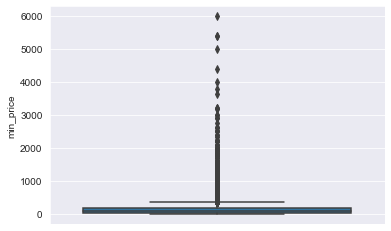

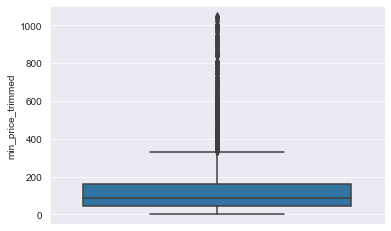

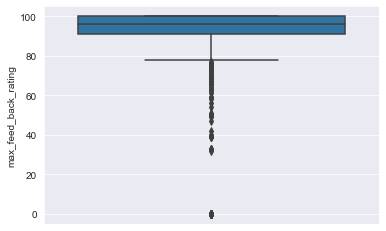

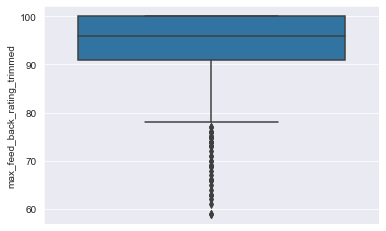

In [111]:
min_prices = ['min_price', 'min_price_trimmed', 'max_feed_back_rating', 'max_feed_back_rating_trimmed']

for column in min_prices:
    sns.boxplot(y=data[column])
    plt.show()

In [112]:
data.head()

,BBR,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating,min_price_trimmed,max_feed_back_rating_trimmed
0,0.331197,4,3,False,36.15,100.0,36.15,100.0
1,0.000000,15,0,False,66.98,96.0,66.98,96.0
2,0.000000,2,1,True,99.00,100.0,99.00,100.0
3,0.061601,4,3,True,41.49,99.0,41.49,99.0
4,0.184462,3,2,True,46.79,99.0,46.79,99.0


### Variable Transformation

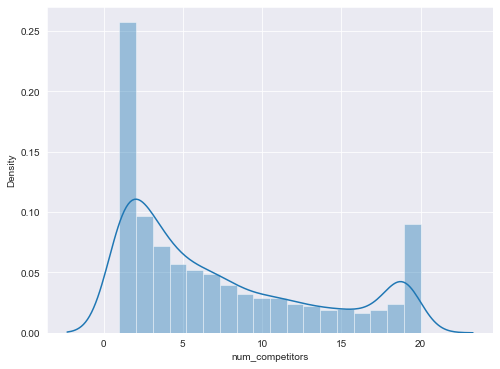

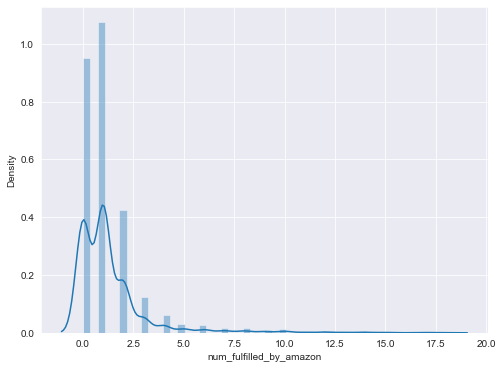

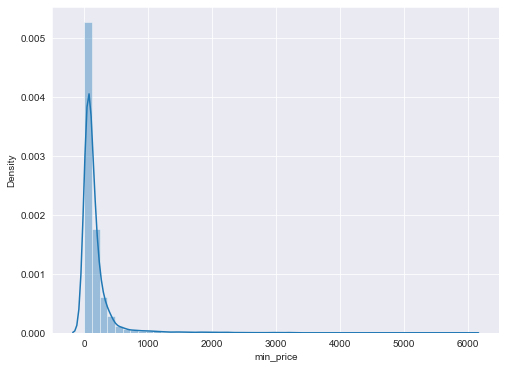

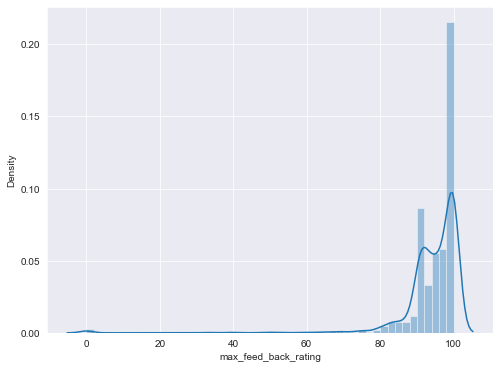

In [113]:
for column in num_cols:
    plot_distplot(column)

### Min_Price (Right-Skewed)

1. Root

In [114]:
data['min_price_root'] = np.power(data['min_price_trimmed'], 0.5)

2. Logrithmic

In [115]:
data['min_price_log'] = np.log(data['min_price'])
data['min_price_trimmed_log'] = np.log(data['min_price_trimmed'])

3. Reciprocal

In [116]:
data['min_price_rec'] = 1/(data['min_price_trimmed'])

#### Plotting new transformed min_price columns w.r.t BBR

In [117]:
col_min_price = ['min_price', 
                 'min_price_trimmed',
                 'min_price_root',  
                 'min_price_log',
                 'min_price_trimmed_log']

In [118]:
# for column in col_min_price:
#     sns.scatterplot(data=data, x=column, y='BBR', hue='amazon_present')
#     plt.show()

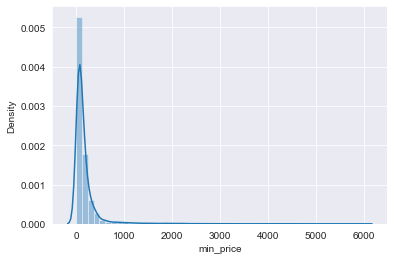

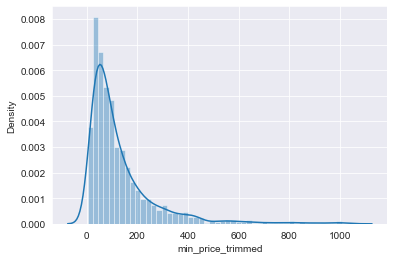

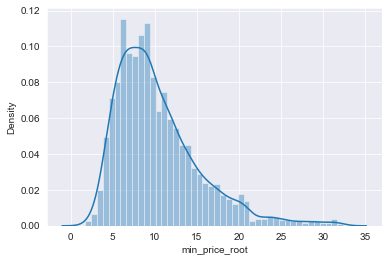

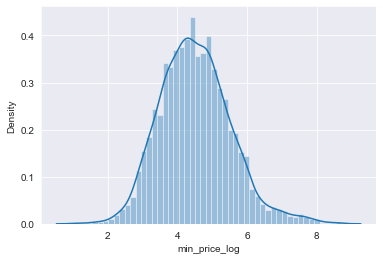

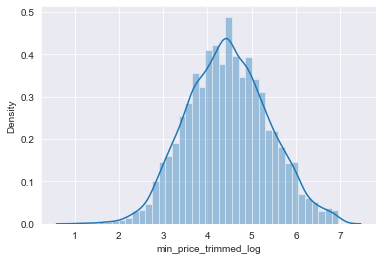

In [119]:
for column in col_min_price:
    sns.distplot(data[column])
    plt.show()

### Max Feedback (Left Skewed)

In [120]:
data['max_feed_back_sq'] = np.power(data['max_feed_back_rating'], 2)
data['max_feed_back_trim_sq'] = np.power(data['max_feed_back_rating_trimmed'],2)
data['max_feed_back_exp'] = np.exp(data['max_feed_back_rating'])
data['max_feed_back_trim_exp'] = np.exp(data['max_feed_back_rating_trimmed'])


col_max_feed = ['max_feed_back_rating', 
                 'max_feed_back_rating_trimmed',
                 'max_feed_back_sq',
                 'max_feed_back_trim_sq', 
                 'max_feed_back_exp', 
                 'max_feed_back_trim_exp']

# for column in col_max_feed:
#     sns.scatterplot(data=data, x=column, y='BBR')
#     plt.show()

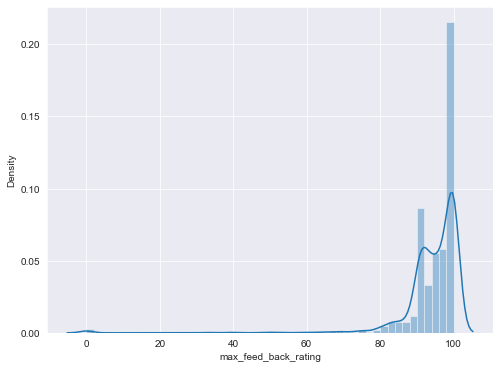

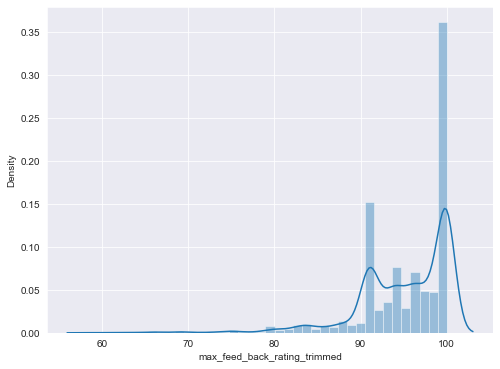

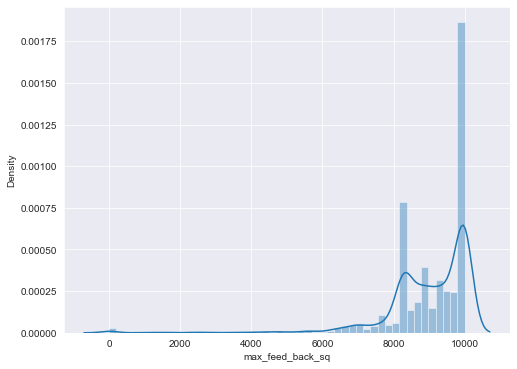

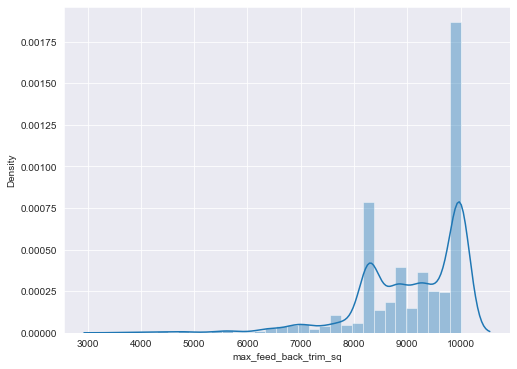

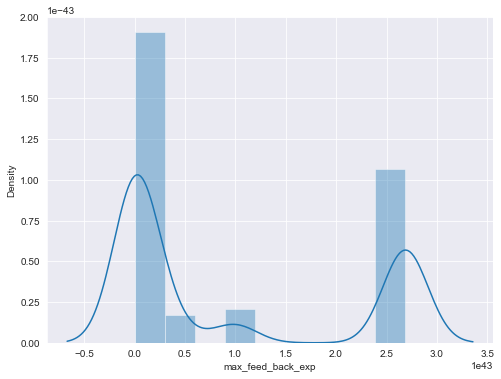

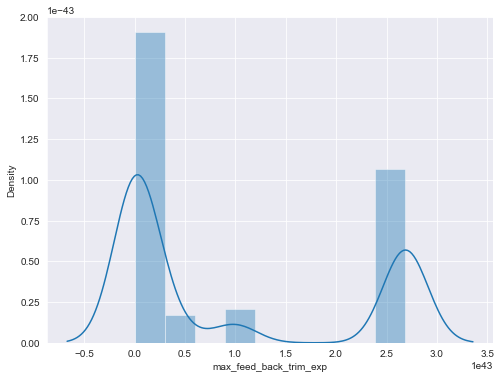

In [121]:
for column in col_max_feed:
    plot_distplot(column)

### Num Competitors (Right-skewed)

In [122]:
data['num_competitors_root'] = np.power(data['num_competitors'], 0.5)
data['num_competitors_log'] = np.log(data['num_competitors'])
data['num_competitors_rec'] = 1/(data['num_competitors'])


col_num_com = ['num_competitors', 
                 'num_competitors_root',
                 'num_competitors_log', 
                 'num_competitors_rec']

# for column in col_num_com:
#     sns.scatterplot(data=data, x=column, y='BBR')
#     plt.show()

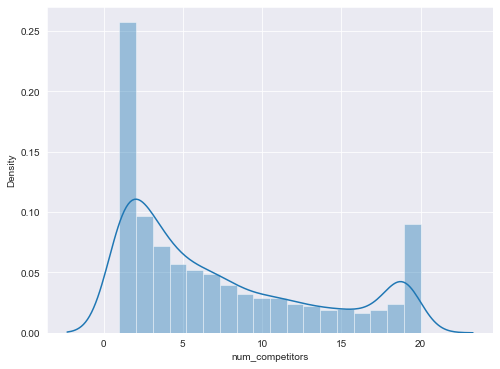

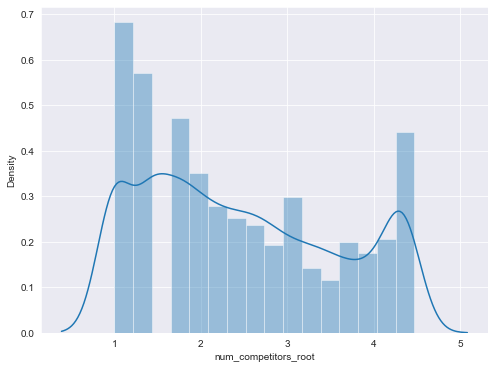

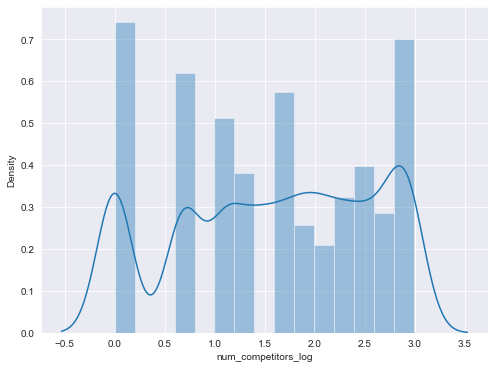

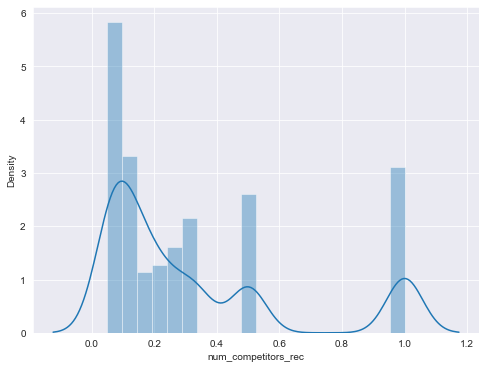

In [123]:
for column in col_num_com:
    plot_distplot(column)

### Num fulfilled by amazon (Right-skewed) 

Num fulfilled by Amazon (Right-skewed) contains value 0 for which log and reciprocal transformation is not possible

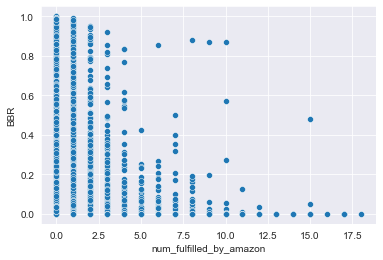

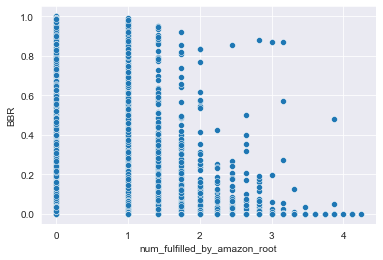

In [124]:
data['num_fulfilled_by_amazon_root'] = np.power(data['num_fulfilled_by_amazon'],0.5)

col_num_ful = ['num_fulfilled_by_amazon', 'num_fulfilled_by_amazon_root']

for col in col_num_ful:
    sns.scatterplot(data=data, x=col, y='BBR')
    plt.show()

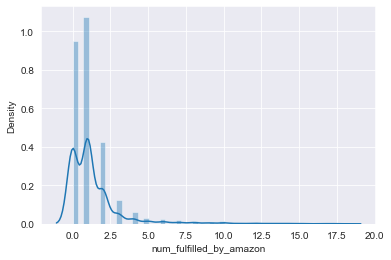

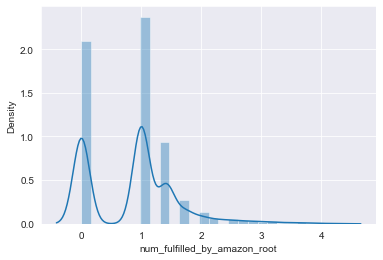

In [125]:
for col in col_num_ful:
    sns.distplot(data[col])
    plt.show()

Label Encoding

In [126]:
data['amazon_present'] = data['amazon_present'].apply(lambda x: 1 if x==True else 0)
data.head()

,BBR,num_competitors,num_fulfilled_by_amazon,amazon_present,min_price,max_feed_back_rating,min_price_trimmed,max_feed_back_rating_trimmed,min_price_root,min_price_log,min_price_trimmed_log,min_price_rec,max_feed_back_sq,max_feed_back_trim_sq,max_feed_back_exp,max_feed_back_trim_exp,num_competitors_root,num_competitors_log,num_competitors_rec,num_fulfilled_by_amazon_root
0,0.331197,4,3,0,36.15,100.0,36.15,100.0,6.012487,3.587677,3.587677,0.027663,10000.0,10000.0,2.688117e+43,2.688117e+43,2.000000,1.386294,0.250000,1.732051
1,0.000000,15,0,0,66.98,96.0,66.98,96.0,8.184131,4.204394,4.204394,0.014930,9216.0,9216.0,4.923458e+41,4.923458e+41,3.872983,2.708050,0.066667,0.000000
2,0.000000,2,1,1,99.00,100.0,99.00,100.0,9.949874,4.595120,4.595120,0.010101,10000.0,10000.0,2.688117e+43,2.688117e+43,1.414214,0.693147,0.500000,1.000000
3,0.061601,4,3,1,41.49,99.0,41.49,99.0,6.441273,3.725452,3.725452,0.024102,9801.0,9801.0,9.889030e+42,9.889030e+42,2.000000,1.386294,0.250000,1.732051
4,0.184462,3,2,1,46.79,99.0,46.79,99.0,6.840322,3.845670,3.845670,0.021372,9801.0,9801.0,9.889030e+42,9.889030e+42,1.732051,1.098612,0.333333,1.414214


## Modeling

In [127]:
reg_col = ['amazon_present',
           'min_price_log',
           'num_fulfilled_by_amazon_root',
           'num_competitors_log',
          'max_feed_back_sq']

In [128]:
features = data[reg_col]
target = data['BBR']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target,
                                                                            test_size=0.2,
                                                                            random_state=42)

In [129]:
features.head()

,amazon_present,min_price_log,num_fulfilled_by_amazon_root,num_competitors_log,max_feed_back_sq
0,0,3.587677,1.732051,1.386294,10000.0
1,0,4.204394,0.000000,2.708050,9216.0
2,1,4.595120,1.000000,0.693147,10000.0
3,1,3.725452,1.732051,1.386294,9801.0
4,1,3.845670,1.414214,1.098612,9801.0


In [130]:
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_train_scaled = pd.DataFrame(features_train_scaled, columns=features_train.columns)

features_test_scaled = scaler.transform(features_test)
features_test_scaled = pd.DataFrame(features_test_scaled, columns=features_test.columns)

In [131]:
features_train_scaled.head()

,amazon_present,min_price_log,num_fulfilled_by_amazon_root,num_competitors_log,max_feed_back_sq
0,0.0,0.328756,0.000000,0.649561,1.0000
1,1.0,0.402426,0.235702,0.462756,0.9409
2,1.0,0.409397,0.235702,0.733452,0.9409
3,0.0,0.276400,0.408248,0.598104,1.0000
4,0.0,0.471472,0.333333,0.768622,0.9801


In [132]:
model = LinearRegression()
model.fit(features_train_scaled, target_train)
target_pred = model.predict(features_test_scaled)

y = target_test
y_pred = target_pred

rss = np.sum(np.square(y - y_pred))
print('RSS: ', rss)
print('r2 score: ', r2_score(y, y_pred))
mse = mean_squared_error(y, y_pred)
print('MSE: ', mse)
rmse = mse**0.5
print('RMSE: ', rmse)
mae = mean_absolute_error(y, y_pred)
print('MAE: ', mae)

RSS:  61.849226219956904
r2 score:  0.3075118658486794
MSE:  0.06489950285409958
RMSE:  0.2547538083210918
MAE:  0.19743231600408323


In [133]:
X_train_const = sm.add_constant(features_train_scaled)
y_train = target_train.values.reshape(-1,1)
lr = sm.OLS(y_train, X_train_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     387.0
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        03:22:03   Log-Likelihood:                -239.20
No. Observations:                3809   AIC:                             490.4
Df Residuals:                    3803   BIC:                             527.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [134]:
report = data[reg_col]
targett = data['BBR']

In [135]:
# Selecting Top3 columns
lr = LinearRegression()
rfe = RFE(lr, 3)
rfe = rfe.fit(report, targett)

In [136]:
pd.DataFrame(zip(report.columns, rfe.ranking_),columns=["Columns","Ranking"])

,Columns,Ranking
0,amazon_present,1
1,min_price_log,2
2,num_fulfilled_by_amazon_root,1
3,num_competitors_log,1
4,max_feed_back_sq,3


### XGBoost

In [137]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV?

In [138]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [139]:
features_train_scaled.head()

,amazon_present,min_price_log,num_fulfilled_by_amazon_root,num_competitors_log,max_feed_back_sq
0,0.0,0.328756,0.000000,0.649561,1.0000
1,1.0,0.402426,0.235702,0.462756,0.9409
2,1.0,0.409397,0.235702,0.733452,0.9409
3,0.0,0.276400,0.408248,0.598104,1.0000
4,0.0,0.471472,0.333333,0.768622,0.9801


In [140]:
from xgboost import XGBRegressor


alphas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100]
n_estimators = [10,25,50,75,100,125,150]

param = {'alpha': alphas,
        'n_estimators': n_estimators}

xgboost_cv = GridSearchCV(estimator = XGBRegressor(),
                       param_grid = param,
                       scoring = 'neg_mean_squared_error',
                       cv = 10,
                       return_train_score=True,
                       verbose=0)
xgboost_cv.fit(features_train_scaled, target_train)
xgboost_cv.best_params_

{'alpha': 5, 'n_estimators': 50}

In [141]:
best_alpha = xgboost_cv.best_params_['alpha']
best_est = xgboost_cv.best_params_['n_estimators']

# Training model with best alpha
xgboost = XGBRegressor(alpha=best_alpha, n_estimators=best_est)
xgboost.fit(features_train_scaled, target_train)

XGBRegressor(alpha=5, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=5, ...)

In [142]:
target_train_pred_xg = xgboost.predict(features_train_scaled)
target_pred_xg = xgboost.predict(features_test_scaled)

In [143]:
print('*'*50)
print('Metrics Performance')
print('*'*50)


print(50*'-')
print('TRAIN DATA')
print(50*'-')


# Train
r2_train_xg = r2_score(target_train, target_train_pred_xg)
print("R-Squared",round(r2_train_xg,3))
adjusted_r_train_xg = 1 - (1-r2_train_xg)*(len(target_train)-1)/(len(target_train)-features_train.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_train_xg,3))
mse_train_xg = mean_squared_error(target_train, target_train_pred_xg)
print("MSE",round(mse_train_xg,3))
rmse_train_xg = mse_train**0.5
print('RMSE: ', round(rmse_train_xg,3))
mae_train_xg = mean_absolute_error(target_train, target_train_pred_xg)
print('MAE: ', round(mae_train_xg,3))

residuals_train_xg = target_train - target_train_pred_xg
rss_train_xg = np.sum(np.square(residuals_train_xg))
print('RSS: ', round(rss_train_xg,3))

print(50*'-')
print('TEST DATA')
print(50*'-')


# Test
r2_test_xg = r2_score(target_test, target_pred_xg)
print('R-Squared: ', round(r2_test_xg,3))
adjusted_r_test_xg = 1 - (1-r2_test_xg)*(len(target_test)-1)/(len(target_test)-features_test.shape[1]-1)
print('Adj. R-Squared: ', round(adjusted_r_test_xg,3))


mse_test_xg = mean_squared_error(target_test, target_pred_xg)
print('MSE: ', round(mse_test_xg,3))
rmse_test_xg = mse_test**0.5
print('RMSE: ', round(rmse_test_xg,3))
mae_test_xg = mean_absolute_error(target_test, target_pred_xg)
print('MAE: ', round(mae_test_xg,3))


# RSS
residuals_test_xg = target_test - target_pred_xg
rss_test_xg = np.sum(np.square(residuals_test_xg))
print('RSS: ', round(rss_test_xg,3))

print('*'*50)

**************************************************
Metrics Performance
**************************************************
--------------------------------------------------
TRAIN DATA
--------------------------------------------------
R-Squared 0.47
Adj. R-Squared:  0.47
MSE 0.053
RMSE:  0.265
MAE:  0.171
RSS:  202.044
--------------------------------------------------
TEST DATA
--------------------------------------------------
R-Squared:  0.375
Adj. R-Squared:  0.372
MSE:  0.059
RMSE:  0.261
MAE:  0.18
RSS:  55.785
**************************************************
